### Group Members:
Qihua Zhu, Qinghao Xia

## 1 **Background**:

Stand for Houston Airport, we want to increase the profit and improve service quality.

We could improve the terminal distribute process in order to reduce the congestion and let the stores in airport profit lot more. We could also optimize the opening hours for certain stores.

To do so, we could look through the relationship between the DepDelay and distance, the relationship between the DepDelay and ArrDelay, and on what time of a day the airport would be busiest.

## 2 Data cleaning:

- First, we need to eliminate the affect of cancelled flight
- Second, we would limit the range in IAH airport in Origin which means we would analysis the flight data that only departure from IAH
- If DepDelay < 0, then = 0. By using is code, we eliminate the affect of the early departure and arrive.
- local time(arr dep Time) turn into hhmmss(Local time can be used in make histogram.)

## 3 Coding

In [6]:
# Pandas environment setup 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import datetime
import time
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
flights = pd.read_csv(filename)

After review the whole dataset, we decide that the data we need to conduct our analysis are "Origin", "Distance", "DepTime", "DepDelay", "ArrDelay", and "Cancelled"

In [15]:
# Create a new dataframe from csv and then do som data cleaning
# filter Canceled flights, if DepDelay < 0 then DepDelay = 0
df = pd.DataFrame(flights, columns = ['Origin', 'Distance', 'DepTime','ArrDelay','DepDelay','Cancelled'])
df.fillna(0)
df2 = df[(df.Origin == "IAH")&(df.Cancelled == 0)] # restrict the data to IAH airport and the flights that didn't cancelled
df2

,Origin,Distance,DepTime,ArrDelay,DepDelay,Cancelled
0,IAH,224,1400.0,-10.0,0.0,0
1,IAH,224,1401.0,-9.0,1.0,0
2,IAH,224,1352.0,-8.0,-8.0,0
3,IAH,224,1403.0,3.0,3.0,0
4,IAH,224,1405.0,-3.0,5.0,0
5,IAH,224,1359.0,-7.0,-1.0,0
6,IAH,224,1359.0,-1.0,-1.0,0
7,IAH,224,1355.0,-16.0,-5.0,0
8,IAH,224,1443.0,44.0,43.0,0
9,IAH,224,1443.0,43.0,43.0,0


In [16]:
#Use describe function to see some insights in the dataset.
df.describe(include='all')

,Origin,Distance,DepTime,ArrDelay,DepDelay,Cancelled
count,20000,20000.000000,19785.000000,19738.000000,19785.000000,20000.000000
unique,2,NaN,NaN,NaN,NaN,NaN
top,IAH,NaN,NaN,NaN,NaN,NaN
freq,15681,NaN,NaN,NaN,NaN,NaN
mean,NaN,772.899550,1396.328228,5.205340,8.297700,0.011200
std,NaN,458.640531,441.598739,25.383494,23.934218,0.105238
min,NaN,127.000000,1.000000,-49.000000,-18.000000,0.000000
25%,NaN,351.000000,1026.000000,-8.000000,-3.000000,0.000000
50%,NaN,787.000000,1416.000000,0.000000,1.000000,0.000000
75%,NaN,1034.000000,1801.000000,11.000000,10.000000,0.000000


After review of same insight we know that  the **average departure delay time** is 8.29 minutes and the **average arrive delay time** is 5.20 minutes. The **maximum departure delay** time is 780 minutes and the **maximum arrive time** is 775 minutes. The **minimum departure and arrive time** is negative 18 and negative 49 minutes respectively. 

We believe that the negative number of minimum departure and arrive time represent the departure and arrive in advance.  Also, we think that these negative number may have impact on the analysis. Thus, I set the **negative number equals 0** to eliminate the affect of early departure and arrive.

In [17]:
# Re-run this modified code to eliminate the affect of early departure and arrive.  
df = pd.DataFrame(flights, columns = ['Origin', 'Distance', 'DepTime','ArrDelay','DepDelay','Cancelled'])
df2 = df.where(df > 0,0)
df3 = df2[(df.Origin == "IAH")&(df.Cancelled == 0)]

Dt = (df3.DepTime.astype(int))/100  # Transfer the hhmm time format to 24h format
DT = Dt.astype(int)
df3["DepTime"] = DT
df3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Origin,Distance,DepTime,ArrDelay,DepDelay,Cancelled
0,IAH,224,14,0.0,0.0,0
1,IAH,224,14,0.0,1.0,0
2,IAH,224,13,0.0,0.0,0
3,IAH,224,14,3.0,3.0,0
4,IAH,224,14,0.0,5.0,0
5,IAH,224,13,0.0,0.0,0
6,IAH,224,13,0.0,0.0,0
7,IAH,224,13,0.0,0.0,0
8,IAH,224,14,44.0,43.0,0
9,IAH,224,14,43.0,43.0,0


After finished the work on data cleaning, we use the code below to draw a scatter plot to show the relationship between the distance and departure delay. We assume that  relationship would be the longer the distance the longer the departure delay time. However, the scatter plot actually shows the very week relationship between the distance and departure delay time. Therefore, we conclude that there is only a very small chance that the longer departure delay time is due to long flight distance.

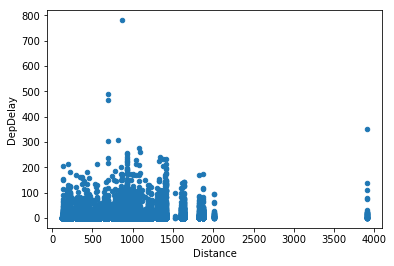

In [18]:
#What is the relationship between the DepDelay and Distance?

# line plot of Airplanes' DepDelay by Distance
ax1 = df3.plot.scatter(x='Distance', 
                        y='DepDelay')
ax1;

The next thing we want to know is whether the delayed depart flight could catch up the time during the travel and make an on-time arrive. To understand this question, we decide to see the relationship between the departure delay time and arrive delay time. If there is a positive relationship exist, we can conclude that the delayed depart flight cannot make the on-time arrive. Otherwise, the delayed depart flight can catch up the time during the flight. 

According to the scatter plot below, we find that there is a strong positive relationship between the departure delay time and the arrive delay time. Therefore, we conclude that the delayed depart flight cannot make a on-time arrive.

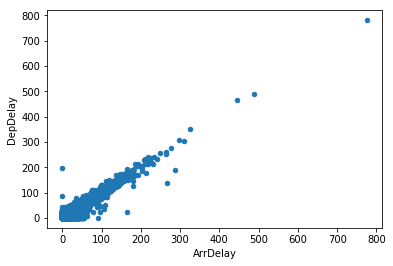

In [19]:
ax2 = df3.plot.scatter(x='ArrDelay', 
                        y='DepDelay')
ax2;

Through the histogram shown below, we could know that the Busiest time of IAH airport is about 7~8 a.m. and 3 p.m. so that the airport should prepare more at that time.

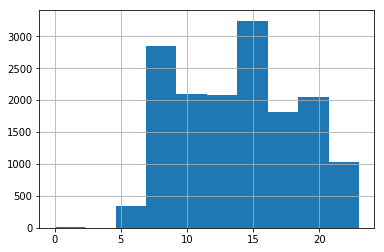

In [21]:
df3['DepTime'].hist(bins=10, range=[0,23]); # 0 is equal to 00:00

In General,
We found there is no significant relationship between Distance and Departure Delay, most Departure Delay would relate to an Arrive Delay, and the Busiest time period are 7~8 a.m. and 3 p.m.

Therefore, when consider Terminal distribution, IAH do not need to consider flight distance of certain flights. Because most Departure Delay would relate to an Arrive Delay, IAH should reduce the Departure Delay. One of the Methods could be better prepare during 7~8 a.m. and 3 p.m.